In [2]:
import pandas as pd 
import numpy as np
from PIL import Image
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import p_utils as utl
import cv2

In [2]:
attr_celeb=pd.read_csv('files/list_attr_celeba.csv')
eval=pd.read_csv('files/list_eval_partition.csv')
bbox=pd.read_csv('files/list_bbox_celeba.csv')

In [3]:
#initializing face detection
facec=cv2.CascadeClassifier('face_detection/haarcascade_frontalface_default.xml')

In [4]:
# imgs_path=('img_align_celeba/img_align_celeba/000001.jpg')
# img=cv2.imread(imgs_path)
# img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# img2 = tf.constant(img, dtype=tf.float32)
# image1=np.array(img2/255)
# plt.imshow(image1)
# #since it's greyscale and therefore doesn't have a 3 after the size,
# # (90,108,3) for shape in rgb it needs a one (90,108,1) for grey scale
# image=np.expand_dims(image1,-1)
# # since it's a single img it still needs a batch size of one to be the right shape
# image=np.expand_dims(image,0)
# print(image.shape)

In [5]:
attr_celeb.columns

Index(['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Attractive',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young'],
      dtype='object')

In [6]:

X_img=eval['image_id']

In [7]:
X_img[1]

'000002.jpg'

In [8]:
img_range=30000

In [9]:

X=[]
imgloc=('img_align_celeba/img_align_celeba/')
for i in range(img_range):
    filename=X_img[i]
    print(f'{i} Attemtpting to import:{imgloc+filename}  ')
    # importing image as greyscale
    img=cv2.imread(imgloc+filename)
    img=cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    #since it's greyscale and therefore doesn't have a 3 after the size,
    # (90,108,3) for shape in rgb it needs a one (90,108,1) for grey scale
    img=np.expand_dims(img,axis=-1)
    size=(90,90)
    #cropping using face detection
    face=facec.detectMultiScale(img,scaleFactor=1.1,minNeighbors= 9)
    try:
        if face[0][1] > 0:   
            for (x,y,w,h) in face:
                cropped=tf.image.crop_to_bounding_box(img,y,x,h,w)
                image=tf.image.resize(cropped,size)
    except:
        image=tf.image.resize(img,size)
    float_images = np.array(image).astype(np.float32)
    normalized=[img/255 for img in float_images]
    img=np.array(normalized)
    X.append(img)

0 Attemtpting to import:img_align_celeba/img_align_celeba/000001.jpg  
1 Attemtpting to import:img_align_celeba/img_align_celeba/000002.jpg  
2 Attemtpting to import:img_align_celeba/img_align_celeba/000003.jpg  
3 Attemtpting to import:img_align_celeba/img_align_celeba/000004.jpg  
4 Attemtpting to import:img_align_celeba/img_align_celeba/000005.jpg  
5 Attemtpting to import:img_align_celeba/img_align_celeba/000006.jpg  
6 Attemtpting to import:img_align_celeba/img_align_celeba/000007.jpg  
7 Attemtpting to import:img_align_celeba/img_align_celeba/000008.jpg  
8 Attemtpting to import:img_align_celeba/img_align_celeba/000009.jpg  
9 Attemtpting to import:img_align_celeba/img_align_celeba/000010.jpg  
10 Attemtpting to import:img_align_celeba/img_align_celeba/000011.jpg  
11 Attemtpting to import:img_align_celeba/img_align_celeba/000012.jpg  
12 Attemtpting to import:img_align_celeba/img_align_celeba/000013.jpg  
13 Attemtpting to import:img_align_celeba/img_align_celeba/000014.jpg  
14

In [10]:
np.array(X).shape

(30000, 90, 90, 1)

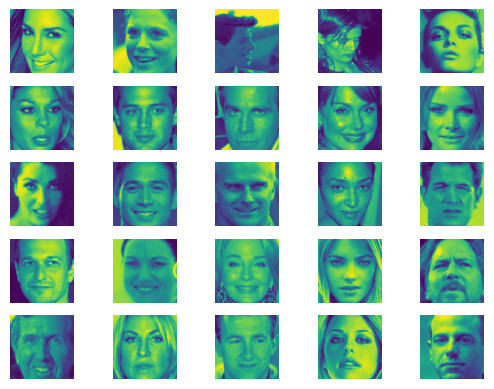

In [11]:
for i in range(25):
    ax= plt.subplot(5,5, i+1)
    plt.imshow(X[i])
    plt.axis('off')

In [12]:
y=attr_celeb[0:len(X)]
y.shape

(30000, 41)

In [13]:
y

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,029996.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,1,-1,-1,-1,1
29996,029997.jpg,-1,-1,-1,-1,-1,-1,1,1,1,...,-1,1,-1,-1,-1,-1,-1,-1,1,1
29997,029998.jpg,-1,-1,-1,-1,-1,-1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
29998,029999.jpg,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1


In [14]:
y['Smiling'].value_counts()

Smiling
-1    15741
 1    14259
Name: count, dtype: int64

In [15]:
y['Male'].value_counts()

Male
-1    17320
 1    12680
Name: count, dtype: int64

In [16]:
# encoding y to get binary of 0 and 1 instead of -1,1 which messes with the model
encoder=LabelEncoder()
y_smile=encoder.fit_transform(y['Smiling'])
y_gender=encoder.fit_transform(y['Male'])
y_big_nose=encoder.fit_transform(y['Big_Nose'])

In [17]:
y['Smiling']

0        1
1        1
2       -1
3       -1
4       -1
        ..
29995    1
29996    1
29997   -1
29998    1
29999    1
Name: Smiling, Length: 30000, dtype: int64

In [18]:
y_smile

array([1, 1, 0, ..., 0, 1, 1], dtype=int64)

In [19]:
X_train,X_test,y_smile_train,y_smile_test,y_gender_train,y_gender_test=train_test_split(X,y_smile,y_gender, random_state=2, shuffle=False,test_size=0.2)

In [20]:
# Apply augmentation to the whole training dataset
# Define the augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomRotation(0.2),         # Random rotation (20 degrees)
    tf.keras.layers.RandomTranslation(0.1, 0.1), # Random horizontal and vertical shift
    tf.keras.layers.RandomZoom(0.2),             # Random zoom
    tf.keras.layers.RandomFlip('horizontal')     # Random horizontal flip
])

# Create variables to hold the X and y training data
X_train_aug= []
y_smile_train_aug = []
y_gender_train_aug=[]

# Loop through all the images.
for i in range(len(X_train)):
    # Select the image
    img = X_train[i]
    # Select the label from the training data
    smile = y_smile_train[i]
    gender= y_gender_train[i]

    # Ensure that the input data has the correct shape
    img = np.expand_dims(img, axis=0)  # Add batch dimension

    # Add 5 images for every original image
    for j in range(5):
        # Append a new image to the X list
        X_train_aug.append(data_augmentation(img, training=True)[0].numpy())
        # Append the label for the original image to the y list
        y_smile_train_aug.append(smile)
        y_gender_train_aug.append(gender)


# Print the length of each list
print(len(X_train_aug))
print(len(y_gender_train_aug))
print(len(y_smile_train_aug))

120000
120000
120000


In [21]:
np.array(X_test).shape

(6000, 90, 90, 1)

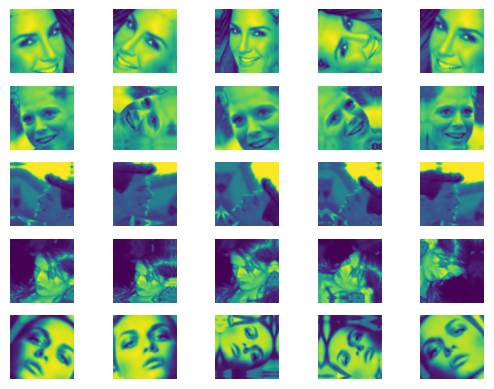

In [22]:
for i in range(25):
    ax= plt.subplot(5,5, i+1)
    plt.imshow(X_train_aug[i]/255.)
    plt.axis('off')

In [23]:
preprocessed={
    'X_train':np.array(X_train_aug),
    'X_test':np.array(X_test),
    'y_smile_train':np.array(y_smile_train_aug),
    'y_smile_test':y_smile_test,
    'y_gender_train':np.array(y_gender_train_aug),
    'y_gender_test':y_gender_test
}

with open('preprocessed_files.pkl', 'wb') as file:
    pickle.dump(preprocessed,file)